# Anomaly Detection using various ML/DL models

## What is an anomaly or outlier?
In statistics, **outliers** are data points that don’t belong to a certain population. It is an abnormal observation that lies far away from other values. An outlier is an observation that diverges from otherwise well-structured data.

### Three Key Steps in Anomaly Detection
1. Build your model
2. Determine a reasonable boundary
3. Present the summary statistics of the normal and abnormal cluster

## What is PyOD?
The Python Outlier Detection (PyOD) module makes your anomaly detection modeling easy. It collects a wide range of techniques ranging from supervised learning to unsupervised learning techniques. You don’t need to test every technique in order to find anomalies. Depending on your data, you will find some techniques work better than others. More popular detection algorithms include PCA, kNN, AutoEncoder, SOS, and XGB.

![PyOD](../img/PyOD.png)

## Understanding Artificial Neural Network:
ANN has the input layer to bring data to the neural network and the output layer that produces the outcome. Between the input and output layers are many hidden layers. The neurons in the first hidden layer perform computations on the weighted inputs to give to the neurons in the next hidden layer, which compute likewise and give to those of the next hidden layer, and so on. When you train a neural network model, the neurons in the input layer are the variables and the neurons in the output layers are the values of the target variable Y.

In other words, These nodes are richly interconnected by weighted and
biased links. The weights and biases are obtained when data are presented to the network
during a training process. Successful training can result in ANNs that perform tasks such
as predicting an output value, classifying an object, approximating a function,
recognizing a pattern in multifactorial data, and completing a known pattern.

## Autoencoder Neural Network
An autoencoder is a special type of neural network that copies the input values to the output values. It does not require the target variable like the conventional Y, thus it is categorized as unsupervised learning. We are not so much interested in the output layer. We are interested in the hidden core layer. If the number of neurons in the hidden layers is less than that of the input layers, the hidden layers will extract the essential information of the input values. This condition forces the hidden layers to learn the most patterns of the data and ignore the “noises”. So in an autoencoder model, the hidden layers must have fewer dimensions than those of the input or output layers. If the number of neurons in the hidden layers is more than those of the input layers, the neural network will be given too much capacity to learn the data. In an extreme case, it could just simply copy the input to the output values, including noises, without extracting any essential information.

The encoding process compresses the input values to get to the core layer. The decoding process reconstructs the information to produce the outcome. The decoding process mirrors the encoding process in the number of hidden layers and neurons.

**Why Do We Apply Dimensionality Reduction to Find Outliers?**
Don’t we lose some information, including the outliers, if we reduce the dimensionality? The answer is once the main patterns are identified, the outliers are revealed. Many distance-based techniques (e.g. KNNs) suffer the curse of dimensionality when they compute distances of every data point in the full feature space. High dimensionality has to be reduced. Interestingly, during the process of dimensionality reduction outliers are identified. We can say outlier detection is a by-product of dimension reduction.

## Why Autoencoders?
Autoencoder models map input data into a hidden representation and then attempt to restore the original input from this internal representation. For regular pieces of data, such reconstruction will be accurate, while in case of anomalies, the decoding result will differ noticeably from the input.


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [8]:
npdata = np.load("../data/data/2018-01-01__2019-01-01__NConservatory_npWeekdayAllOrderedSensorsTimeRef.npy")

In [9]:
npdata

array([[-0.54419175, -0.54419175, -0.57077136, ...,  0.        ,
         0.        ,  0.        ],
       [-0.54419175, -0.57077136, -0.4910508 , ...,  0.        ,
         0.        ,  0.25373134],
       [-0.57077136, -0.4910508 , -0.4910508 , ...,  0.        ,
         0.25373134,  0.25373134],
       ...,
       [-0.23887157, -0.31835641, -0.34485413, ...,  1.        ,
         1.        ,  1.        ],
       [-0.31835641, -0.34485413, -0.34485413, ...,  1.        ,
         1.        ,  1.        ],
       [-0.34485413, -0.34485413, -0.34485413, ...,  1.        ,
         1.        ,  1.        ]])

In [16]:
df = pd.read_csv( index_col = 0,  parse_dates = True, infer_datetime_format = True, 
                         filepath_or_buffer = '../data/data/weekdayData_scaled.csv')
df.head()

,co2_1,co2_2,co2_3,co2_4,temp_1,temp_2,temp_3,temp_4,dew_1,dew_2,...,relH_1,relH_2,relH_3,relH_4,externTemp_1,externHumid_1,externSunrise_1,externCondition_1,hourIndex,dayIndex
2018-01-01 00:00:03-08:00,-0.544192,-0.601379,-0.539805,-0.627250,-1.703976,-1.547899,-1.418451,-1.354052,-1.197150,-1.229398,...,0.389873,0.528953,0.900944,1.497642,-1.517908,0.657143,1.0,0.5,0.000000,0.0
2018-01-01 00:15:03-08:00,-0.544192,-0.601379,-0.566085,-0.627250,-1.748649,-1.595376,-1.488387,-1.394638,-1.153817,-1.182499,...,0.504717,0.814047,1.101336,1.510195,-1.517908,0.657143,1.0,0.5,0.000000,0.0
2018-01-01 00:30:03-08:00,-0.570771,-0.575309,-0.566085,-0.627250,-1.770985,-1.619114,-1.535011,-1.455517,-1.197150,-1.229398,...,0.461277,0.885682,1.058501,1.578237,-1.517908,0.671429,1.0,0.5,0.000000,0.0
2018-01-01 00:45:03-08:00,-0.491051,-0.575309,-0.566085,-0.601043,-1.815657,-1.690329,-1.604947,-1.496103,-1.240507,-1.276270,...,0.620719,0.837291,1.174799,1.467355,-1.517908,0.671429,1.0,0.5,0.000000,0.0
2018-01-01 01:00:03-08:00,-0.491051,-0.601379,-0.539805,-0.601043,-1.837993,-1.737806,-1.651571,-1.516396,-1.283864,-1.276270,...,0.533218,0.848901,1.228265,1.412039,-1.517908,0.671429,1.0,0.5,0.041667,0.0


In [15]:
df.describe()

,co2_1,co2_2,co2_3,co2_4,temp_1,temp_2,temp_3,temp_4,dew_1,dew_2,...,relH_1,relH_2,relH_3,relH_4,externTemp_1,externHumid_1,externSunrise_1,externCondition_1,hourIndex,dayIndex
count,2.503300e+04,2.503300e+04,2.503300e+04,2.503300e+04,2.503300e+04,2.503300e+04,2.503300e+04,2.503300e+04,2.503300e+04,2.503300e+04,...,2.503300e+04,2.503300e+04,2.503300e+04,2.503300e+04,2.503300e+04,25033.000000,25033.000000,25033.000000,25033.000000,25033.000000
mean,-2.168556e-16,1.930128e-16,7.947588e-18,4.995627e-17,-6.977556e-16,-1.964190e-16,1.178833e-15,1.121852e-15,6.278594e-16,-1.180784e-16,...,-1.133099e-15,5.994752e-16,3.633183e-16,5.427067e-16,-2.361569e-16,0.597962,0.500979,0.453192,0.498262,0.496666
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,...,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.192983,0.500009,0.259937,0.301174,0.353326
min,-1.421144e+00,-1.383592e+00,-1.354581e+00,-1.439776e+00,-1.949674e+00,-2.093881e+00,-1.791443e+00,-1.699033e+00,-2.237622e+00,-2.401741e+00,...,-6.153357e+00,-6.620643e+00,-4.837243e+00,-6.947258e+00,-2.715632e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.423146e-01,-7.436227e-01,-7.356788e-01,-7.320949e-01,-1.056230e+00,-1.025656e+00,-1.138706e+00,-1.090243e+00,-1.067103e+00,-1.088701e+00,...,-7.676851e-01,-7.280813e-01,-8.173079e-01,-7.449387e-01,-7.479427e-01,0.471429,0.000000,0.125000,0.218750,0.253731
50%,-3.581802e-01,-3.667208e-01,-3.558209e-01,-3.520836e-01,2.839357e-01,2.799520e-01,3.299538e-01,2.693879e-01,3.635090e-01,3.650111e-01,...,-1.437607e-02,-1.039845e-02,-1.189099e-02,-2.369661e-02,-1.490807e-01,0.628571,1.000000,0.500000,0.479167,0.492537
75%,5.187722e-01,5.197907e-01,5.115231e-01,5.259996e-01,9.316808e-01,9.446262e-01,9.127551e-01,9.796429e-01,8.837455e-01,8.808217e-01,...,7.231972e-01,6.882677e-01,7.835928e-01,7.415991e-01,7.064365e-01,0.742857,1.000000,0.750000,0.739583,0.746269
max,5.302129e+00,5.604175e+00,5.768131e+00,5.925363e+00,1.735781e+00,1.822944e+00,1.612117e+00,1.649312e+00,2.054264e+00,2.428332e+00,...,3.466194e+00,5.039956e+00,5.120257e+00,4.734749e+00,3.016333e+00,1.000000,1.000000,1.000000,1.000000,1.000000


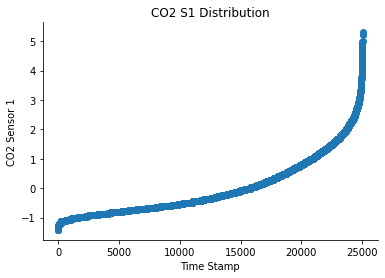

In [17]:
plt.scatter(range(df.shape[0]), np.sort(df['co2_1'].values))
plt.xlabel('Time Stamp')
plt.ylabel('CO2 Sensor 1')
plt.title("CO2 S1 Distribution")
sns.despine()

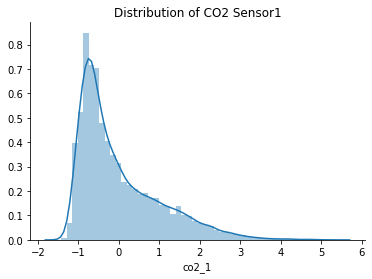

In [18]:
sns.distplot(df['co2_1'])
plt.title("Distribution of CO2 Sensor1")
sns.despine()

In [1]:
# detection using histogram
import numpy as np
import matplotlib.pyplot as plt
seed(1)
anomalies = []

# multiply and add by random numbers to get some real values
data = np.random.randn(50000)  * 20 + 20

# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    # Set upper and lower limit to 3 standard deviation
    random_data_std = std(random_data)
    random_data_mean = mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print(lower_limit)
    # Generate outliers
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

find_anomalies(data)

## Anomaly Detection with PyOD

import numpy as np
import pandas as pd
from pyod.models.knn import KNN
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data

contamination = 0.1  # percentage of outliers
n_train = 500  # number of training points
n_test = 500  # number of testing points
n_features = 25 # Number of features

X_train, y_train, X_test, y_test = generate_data(
    n_train=n_train, n_test=n_test,
    n_features= n_features, 
    contamination=contamination,random_state=1234)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)

from sklearn.decomposition import PCA
pca = PCA(2)
x_pca = pca.fit_transform(X_train)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2']

# Plot
import matplotlib.pyplot as plt
plt.scatter(X_train[0], X_train[1], c=y_train, alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

clf1 = AutoEncoder(hidden_neurons =[25, 2, 2, 25])
clf1.fit(X_train)

# Get the outlier scores for the train data
y_train_scores = clf1.decision_scores_  

# Predict the anomaly scores
y_test_scores = clf1.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)

# Plot it!
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()